<a target="_blank" href="https://colab.research.google.com/github/tomas-gajarsky/facetorch/blob/main/notebooks/facetorch_notebook_demo.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Facetorch notebook demo


## Check GPU availability

In [1]:
# Check GPU availability
!nvidia-smi
# Edit -> Notebook settings -> Hardware accelerator



Mon Sep 30 08:27:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Add cell timer to the notebook

In [2]:
!pip install ipython-autotime
%load_ext autotime

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
time: 355 µs (started: 2024-09-30 08:27:31 +00:00)


## Install dependencies

In [3]:
!python --version
!python -m pip install --upgrade pip
!python -m pip install "facetorch>=0.5.0" "torch==1.13.1+cu117" "torchvision==0.14.1+cu117" "torchaudio==0.13.1" --extra-index-url https://download.pytorch.org/whl/cu117

!pip list | grep facetorch

Python 3.10.12
  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 51.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=1a9466942c59eb1e637fb6288363e9559ef55a000e115238fa1de3d0e8813502
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime
  Attempting uninstall: torch
    Found

## Download config and image

In [4]:
!wget -O ./test.jpg https://github.com/tomas-gajarsky/facetorch/blob/main/data/input/test.jpg?raw=true
!wget -O ./gpu.config.yml https://raw.githubusercontent.com/tomas-gajarsky/facetorch/main/conf/merged/gpu.merged.config.yaml

--2024-09-30 08:30:27--  https://github.com/tomas-gajarsky/facetorch/blob/main/data/input/test.jpg?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tomas-gajarsky/facetorch/raw/refs/heads/main/data/input/test.jpg [following]
--2024-09-30 08:30:28--  https://github.com/tomas-gajarsky/facetorch/raw/refs/heads/main/data/input/test.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tomas-gajarsky/facetorch/refs/heads/main/data/input/test.jpg [following]
--2024-09-30 08:30:28--  https://raw.githubusercontent.com/tomas-gajarsky/facetorch/refs/heads/main/data/input/test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.github

## Import packages

In [5]:
from facetorch import FaceAnalyzer
from facetorch.analyzer.utilizer import LandmarkDrawerTorch
from omegaconf import OmegaConf
from torch.nn.functional import cosine_similarity
from typing import Dict
import operator
import torchvision

time: 2.07 s (started: 2024-09-30 08:30:28 +00:00)


## Configure

In [6]:
path_img_input="./test.jpg"
path_img_output="/test_output.jpg"
path_config="gpu.config.yml"


cfg = OmegaConf.load(path_config)

time: 156 ms (started: 2024-09-30 08:30:30 +00:00)


## Startup

In [7]:
# initialize
analyzer = FaceAnalyzer(cfg.analyzer)

# warmup
response = analyzer.run(
        path_image=path_img_input,
        batch_size=cfg.batch_size,
        fix_img_size=cfg.fix_img_size,
        return_img_data=False,
        include_tensors=True,
        path_output=path_img_output,
    )

{"asctime": "2024-09-30 08:30:31,055", "levelname": "INFO", "message": "Initializing FaceAnalyzer"}
{"asctime": "2024-09-30 08:30:31,057", "levelname": "INFO", "message": "Initializing BaseReader"}
{"asctime": "2024-09-30 08:30:31,374", "levelname": "INFO", "message": "Initializing FaceDetector"}
Downloading...
From: https://drive.google.com/uc?&id=1eMuOdGkiNCOUTiEbKKoPCHGCuDgiKeNC&confirm=t
To: /opt/facetorch/models/torchscript/detector/1/model.pt
100%|██████████| 110M/110M [00:03<00:00, 30.7MB/s]
{"asctime": "2024-09-30 08:30:40,516", "levelname": "INFO", "message": "Initializing FaceUnifier"}
{"asctime": "2024-09-30 08:30:40,580", "levelname": "INFO", "message": "Initializing FacePredictor objects"}
{"asctime": "2024-09-30 08:30:40,582", "levelname": "INFO", "message": "Initializing FacePredictor embed"}
Downloading...
From: https://drive.google.com/uc?&id=19h3kqar1wlELAmM5hDyj9tlrUh8yjrCl&confirm=t
To: /opt/facetorch/models/torchscript/predictor/embed/1/model.pt
100%|██████████| 11

time: 1min 25s (started: 2024-09-30 08:30:31 +00:00)


## Inference

In [8]:
response = analyzer.run(
        path_image=path_img_input,
        batch_size=cfg.batch_size,
        fix_img_size=cfg.fix_img_size,
        return_img_data=cfg.return_img_data,
        include_tensors=cfg.include_tensors,
        path_output=path_img_output,
    )


{"asctime": "2024-09-30 08:31:56,874", "levelname": "INFO", "message": "Running FaceAnalyzer"}
{"asctime": "2024-09-30 08:31:56,875", "levelname": "INFO", "message": "Reading image", "input": "./test.jpg"}
{"asctime": "2024-09-30 08:31:56,963", "levelname": "INFO", "message": "Detecting faces"}
{"asctime": "2024-09-30 08:32:04,236", "levelname": "INFO", "message": "Number of faces: 4"}
{"asctime": "2024-09-30 08:32:04,241", "levelname": "INFO", "message": "Unifying faces"}
{"asctime": "2024-09-30 08:32:04,247", "levelname": "INFO", "message": "Predicting facial features"}
{"asctime": "2024-09-30 08:32:04,249", "levelname": "INFO", "message": "Running FacePredictor: embed"}
{"asctime": "2024-09-30 08:32:17,776", "levelname": "INFO", "message": "Running FacePredictor: verify"}
{"asctime": "2024-09-30 08:32:25,447", "levelname": "INFO", "message": "Running FacePredictor: fer"}
{"asctime": "2024-09-30 08:32:40,542", "levelname": "INFO", "message": "Running FacePredictor: au"}
{"asctime": "

time: 1min 13s (started: 2024-09-30 08:31:56 +00:00)


In [9]:
response.faces[0].tensor.shape

torch.Size([3, 380, 380])

time: 3 ms (started: 2024-09-30 08:33:10 +00:00)


## Output image

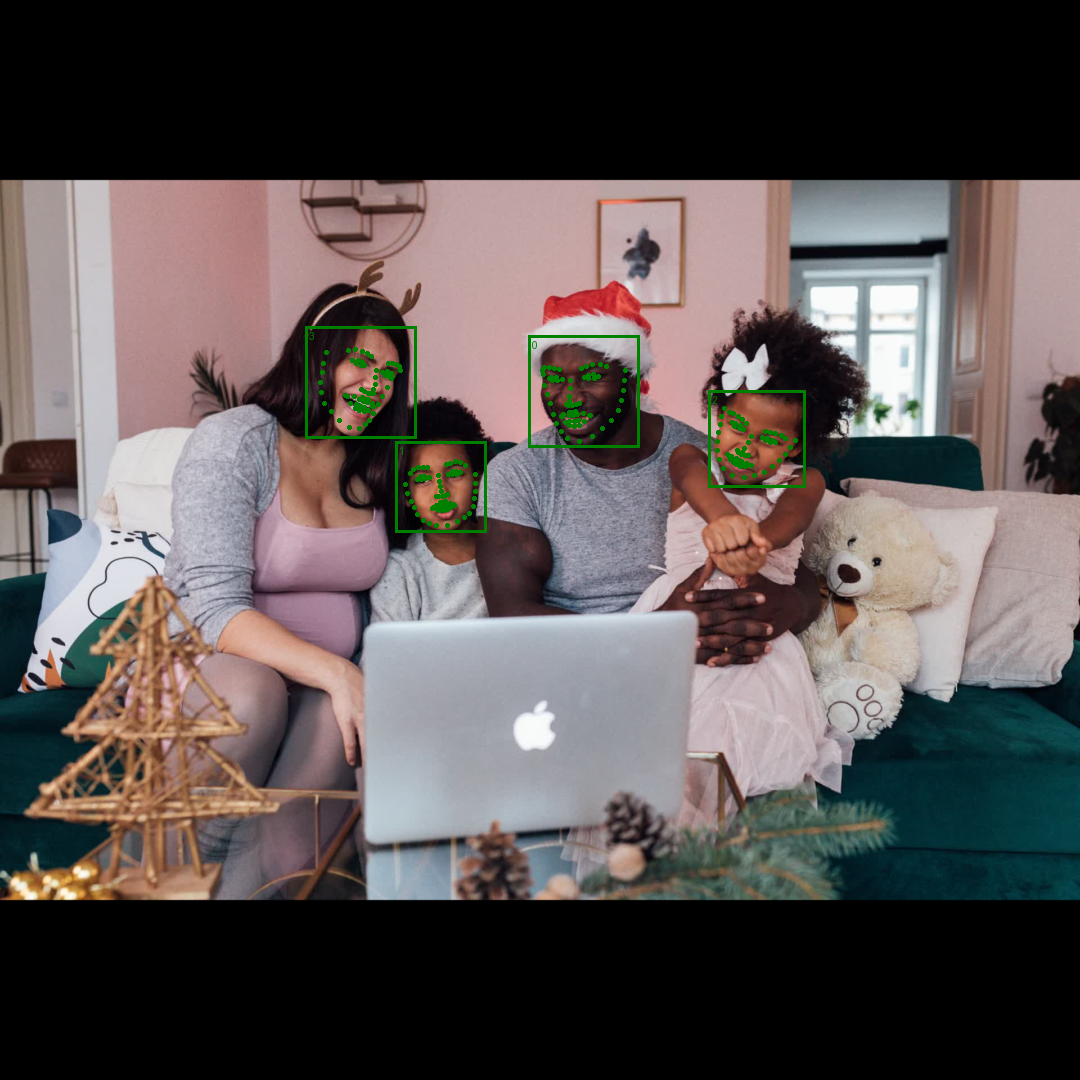

In [10]:
pil_image = torchvision.transforms.functional.to_pil_image(response.img)
pil_image

## Facial Expressions

In [11]:
{face.indx: face.preds["fer"].label for face in response.faces}


{0: 'Happiness', 1: 'Surprise', 2: 'Disgust', 3: 'Happiness'}

time: 134 ms (started: 2024-09-30 08:33:10 +00:00)
time: 962 µs (started: 2024-09-30 08:33:10 +00:00)


## Facial Action Unit Detection

In [12]:
{face.indx: face.preds["au"].other["multi"] for face in response.faces}


{0: ['lid_tightener', 'upper_lip_raiser', 'chin_raiser'],
 1: ['inner_brow_raiser',
  'outer_brow_raiser',
  'upper_lip_raiser',
  'lip_pucker'],
 2: ['lid_tightener', 'upper_lip_raiser', 'lip_corner_puller', 'lip_pucker'],
 3: ['upper_lip_raiser', 'lip_pucker', 'mouth_stretch']}

time: 3.18 ms (started: 2024-09-30 08:33:10 +00:00)


## Facial Valence Arousal

In [13]:
{face.indx: face.preds["va"].other for face in response.faces}

{0: {'valence': 0.738006055355072, 'arousal': 0.23391640186309814},
 1: {'valence': 0.003827070351690054, 'arousal': -0.052586767822504044},
 2: {'valence': 0.6288350224494934, 'arousal': -0.03970566391944885},
 3: {'valence': 0.6307138204574585, 'arousal': 0.26061689853668213}}

time: 4.86 ms (started: 2024-09-30 08:33:10 +00:00)


## Embedding cosine similarity

In [14]:
def compute_embed_similarity(predictor_name: str = "verify", base_face_id: int = 0) -> Dict:
  base_emb = response.faces[base_face_id].preds[predictor_name].logits
  sim_dict = {face.indx: cosine_similarity(base_emb, face.preds[predictor_name].logits, dim=0).item() for face in response.faces}
  sim_dict_sorted = dict(sorted(sim_dict.items(), key=operator.itemgetter(1),reverse=True))
  return sim_dict_sorted

time: 808 µs (started: 2024-09-30 08:33:10 +00:00)


### Face representation learning

In [15]:
compute_embed_similarity(predictor_name="embed")

{0: 1.0,
 2: 0.013164492323994637,
 1: -0.015531610697507858,
 3: -0.03949359804391861}

time: 13.3 ms (started: 2024-09-30 08:33:10 +00:00)


### Face verification

In [16]:
compute_embed_similarity(predictor_name="verify")

{0: 1.0,
 1: 0.1072397530078888,
 2: 0.06132572516798973,
 3: -0.07182557135820389}

time: 5.08 ms (started: 2024-09-30 08:33:10 +00:00)


## Full response

In [17]:
response

ImageData(path_input='./test.jpg', path_output='/test_output.jpg', img=tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8), tensor=tensor([[[[-104., -104., -104.,  ..., -104., -104., -104.],
          [-104., -104., -104.,  ..., -104., -104., -104.],
          [-104., -104., -104.,  ..., -104., -104., -104.],
          ...,
          [-104., -104., -104

time: 177 ms (started: 2024-09-30 08:33:10 +00:00)


<ipython-input-41-345beb2ebe99>:31: ComplexWarning: Casting complex values to real discards the imaginary part
  fftXYZList[i] = fftByDim(currNormFeaturePoints)


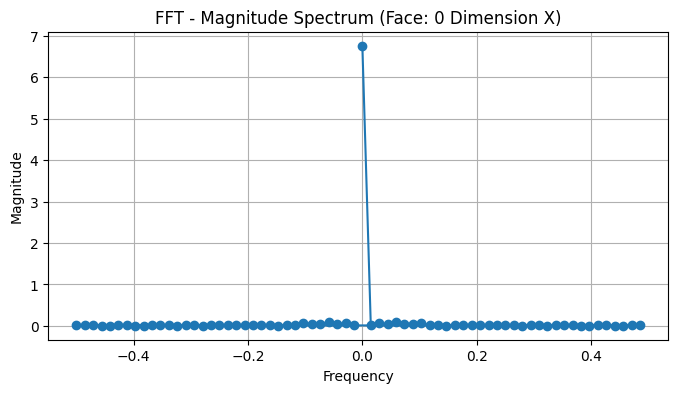

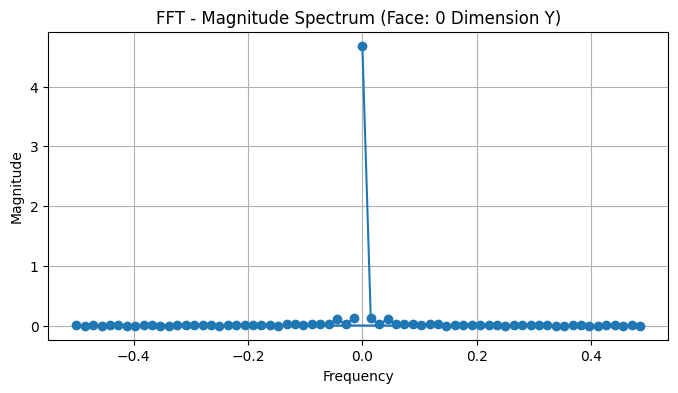

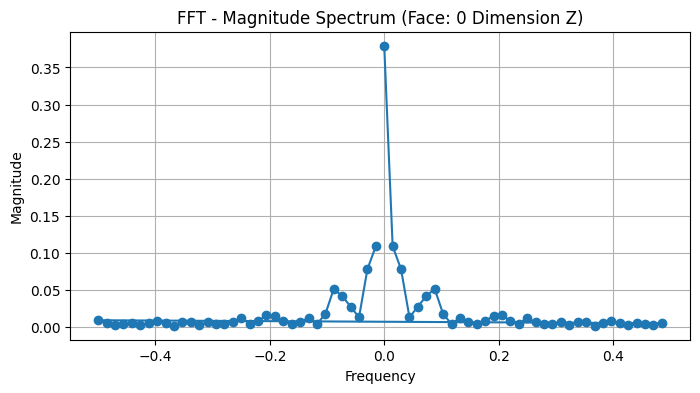

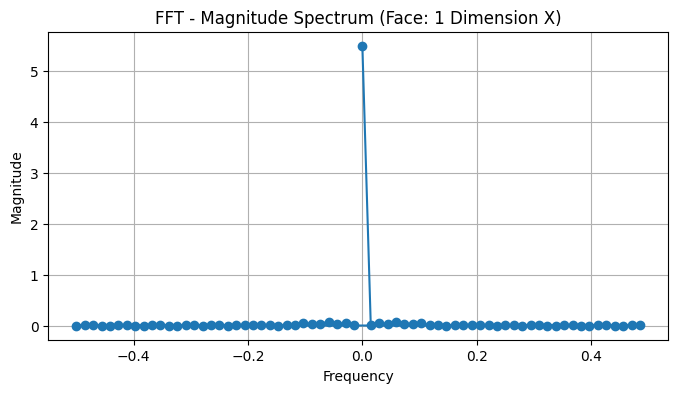

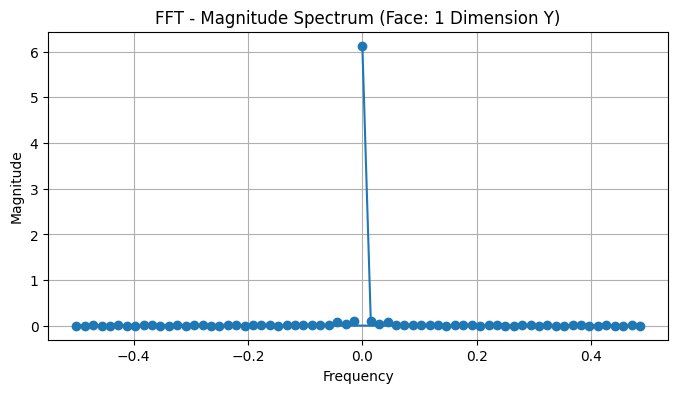

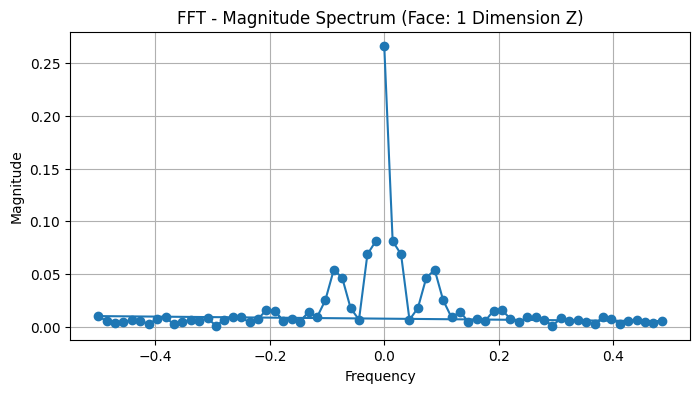

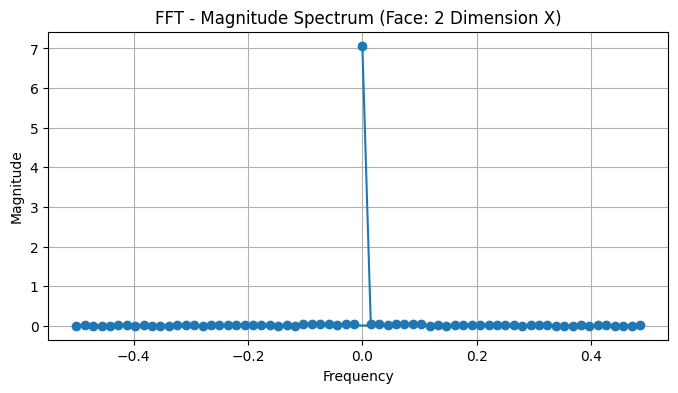

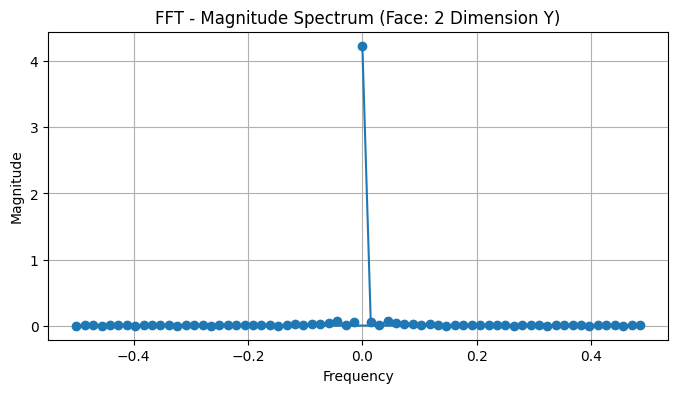

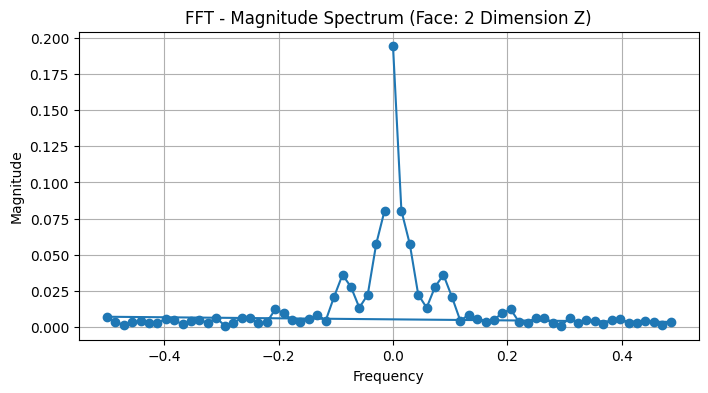

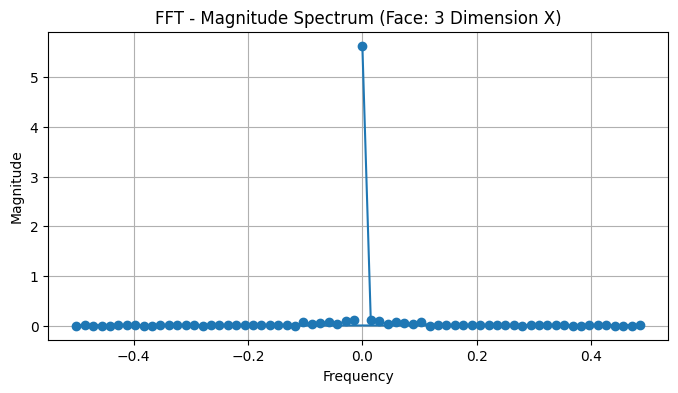

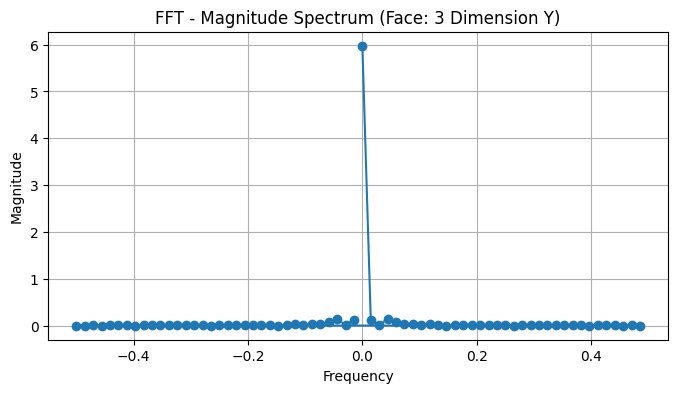

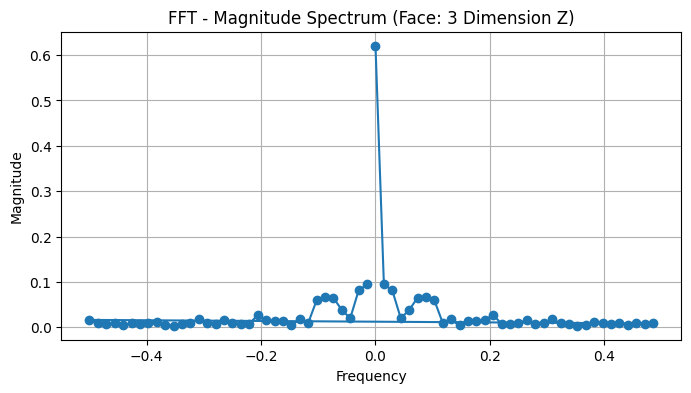

time: 2.51 s (started: 2024-09-30 09:10:16 +00:00)


In [41]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

arr = response.faces[0].preds["align"].other["lmk3d"].cpu().numpy()

# fftByDim: Takes the feature points from a face (3x68) and does a FFT along each of the axis and returns a list of [X,Y,Z]
def fftByDim(faceFeaturePoints):
  transformedPoints = np.zeros(faceFeaturePoints.shape, dtype=np.complex128)
  # For each dim X,Y,Z
  # OBS! if transformedPoints[i], then same as fftVec. But if -i we can assert weather a rotation will have a noticable impact on the FFT
  for i in range(faceFeaturePoints.shape[0]):
    transformedPoints[i] = np.fft.fft(faceFeaturePoints[i])
  return transformedPoints

# fftVec: Takes the feature points from a face and does a FFT on all three dimentions at once
def fftVec(faceFeaturePoints):
  return np.fft.fft(faceFeaturePoints)

numFaces = len(response.faces)
fftXYZList = np.zeros((numFaces, 3, 68))
fft3DVecList = np.zeros((numFaces, 3, 68), dtype=np.complex128)

for i in range(numFaces):
  currFeaturePoints = response.faces[i].preds["align"].other["lmk3d"].cpu().numpy()

  norm = np.linalg.norm(currFeaturePoints)  # Calculate the L2 norm of the data
  currNormFeaturePoints = currFeaturePoints / norm

  fftXYZList[i] = fftByDim(currNormFeaturePoints)
  fft3DVecList[i] = fftVec(currNormFeaturePoints)

# print("fftXYZList:")
# print(fftXYZList)

# print("fft3DVecList:")
# print(fft3DVecList)

currDim = ["X", "Y", "Z"]
faceIndex = 0
for face in fft3DVecList:
  for idx, currDimAnchorPoints in enumerate(face):

    # Compute the frequencies of each point
    frequencies = np.fft.fftfreq(len(currDimAnchorPoints))

    # Compute the magnitude of the FFT result (Amplitude Spectrum)
    magnitude = np.abs(currDimAnchorPoints)

    # Plot the Magnitude Spectrum for the current dataset
    plt.figure(figsize=(8, 4))
    plt.plot(frequencies, magnitude, marker='o')
    plt.title(f"FFT - Magnitude Spectrum (Face: {faceIndex} Dimension {currDim[idx]})")
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.show()
  faceIndex += 1


5465.484986496304


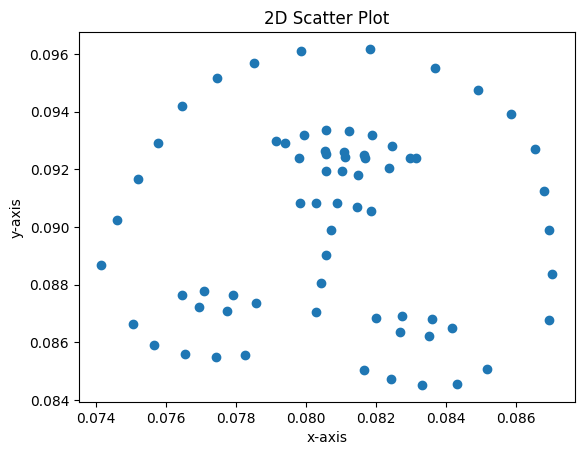

time: 221 ms (started: 2024-09-30 09:09:00 +00:00)


In [40]:
from torch.nn.functional import normalize

pts = [face.preds["align"].other["lmk3d"].cpu() for face in response.faces]

pts = torch.stack(pts)
pts = torch.swapaxes(pts, 2, 1)


# data = normalize(pts[0])
data = pts[1]

norm = np.linalg.norm(data)  # Calculate the L2 norm of the data
normalized_data = data / norm

# Extract the first two columns for 2D scatter plot
x = normalized_data[:, 0]  # First column (x)
y = normalized_data[:, 1]  # Second column (y)
z = normalized_data[:, 2]  # Third column (z)

# Create the 2D scatter plot
plt.scatter(x, y)
# print(len(z))

# Add labels and title
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('2D Scatter Plot')

# Display the plot
plt.show()


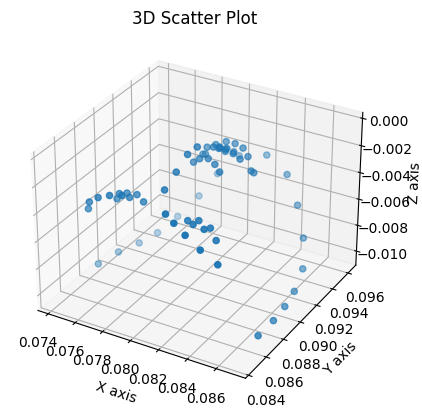

time: 215 ms (started: 2024-09-30 09:06:38 +00:00)


In [37]:
data = pts[1]

# Extract the three columns for 3D scatter plot
x = data[:, 0]  # First column (x)
y = data[:, 1]  # Second column (y)
z = data[:, 2]  # Third column (z)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

norm = np.linalg.norm(data)  # Calculate the L2 norm of the data
normalized_data = data / norm

x = normalized_data[:, 0]  # First column (x)
y = normalized_data[:, 1]  # Second column (y)
z = normalized_data[:, 2]  # Third column (z)

# Create the 3D scatter plot
ax.scatter(x, y, z)

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('3D Scatter Plot')

# Display the plot
plt.show()

[[-4.23775012 -4.22557162 -4.88957218 -4.53423756 -5.50241639 -4.08313756
  -4.28098001 -4.75795183 -4.11973613 -6.21866644 -4.90415253 -5.70300341
  -4.1694914  -4.16334277 -3.77389674 -4.24670428 -3.88194688 -4.35207334
  -4.15037111 -4.04807765 -3.8581026  -3.90989014 -5.14701662 -3.76846003
  -4.96968868 -3.39288174 -4.17945221 -2.49597051 -2.70425737 -2.54975161
  -2.76488205 -2.46280706 -2.36041741 -1.98873991  0.73425216 -1.98873991
  -2.36041741 -2.46280706 -2.76488205 -2.54975161 -2.70425737 -2.49597051
  -4.17945221 -3.39288174 -4.96968868 -3.76846003 -5.14701662 -3.90989014
  -3.8581026  -4.04807765 -4.15037111 -4.35207334 -3.88194688 -4.24670428
  -3.77389674 -4.16334277 -4.1694914  -5.70300341 -4.90415253 -6.21866644
  -4.11973613 -4.75795183 -4.28098001 -4.08313756 -5.50241639 -4.53423756
  -4.88957218 -4.22557162]
 [-5.67368236 -4.60001195 -4.02356385 -5.51815998 -4.71638669 -4.62285069
  -3.99902682 -4.96186708 -4.92925479 -4.01576585 -4.62712    -4.33904957
  -5.247390

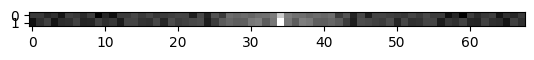

time: 221 ms (started: 2024-09-30 09:27:09 +00:00)


In [49]:
arr = response.faces[0].preds["align"].other["lmk3d"].cpu().numpy()

arrTwoDim = arr[:-1]

norm = np.linalg.norm(arrTwoDim)  # Calculate the L2 norm of the data
normalized_data = arrTwoDim / norm
transformed = np.fft.fft2(normalized_data)
transformedShifted = np.fft.fftshift(transformed)
logAbs = np.log(np.abs(transformedShifted))
print(logAbs)
plt.imshow(logAbs, cmap='gray')
plt.show()
